In [1]:
from pycap import plot_data
import sys
sys.path.append('/notebooks')
from battery import Dualfoil, graph_profiles_3D
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt

In [2]:
battery = Dualfoil(path='/notebooks/docker/dualfoil5-1/')
v = battery.get_voltage()

In [3]:
battery.reset()

for i in range(100):
    battery.evolve_one_time_step_constant_current(10, 10.0)
new_v = battery.get_voltage()
battery.evolve_one_time_step_constant_voltage(240, new_v)


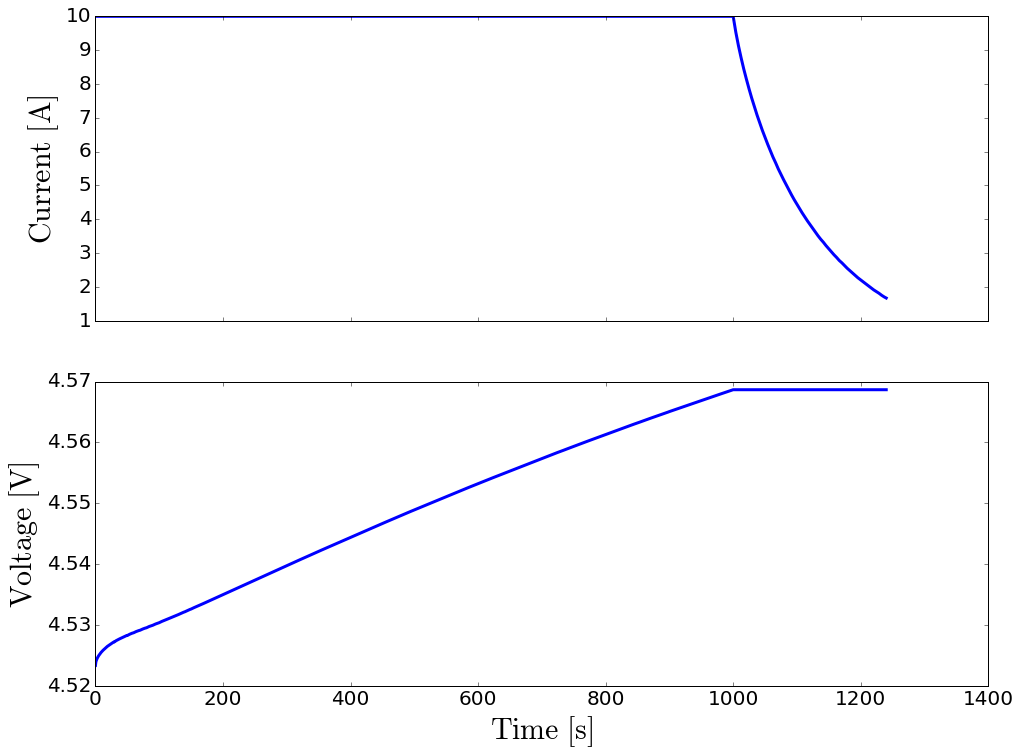

In [4]:
data = battery.outbot.output.copy()

for key in data.keys():
    data[key] = np.array(data[key])
data['voltage'] = data['potential']
data['time'][:] *= 60

% matplotlib inline
plot_data(data)

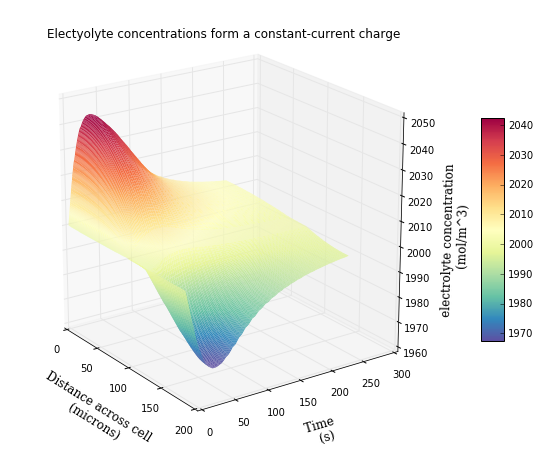

In [7]:
profiles = battery.outbot.profiles.copy()
# number of indices per cycle

x = profiles['distance'][0]
y = profiles['time'][:125]
z = profiles['electrolyte_conc'][:125]

fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection='3d')
ax.set_xlabel('Distance across cell \n (microns)', labelpad=15,
              size='large', fontname='serif')
ax.set_ylabel('Time \n (s)', labelpad=15,
              size='large', fontname='serif')
ax.set_zlabel('electrolyte concentration \n (mol/m^3)', labelpad=15,
              size='large', fontname='serif')
ax.set_title('Electyolyte concentrations form a constant-current charge',
             size='large', fontname='sans-serif')

#all parameters must be 2D arrays; x&y mesh together
x = np.array(x)

y = np.array(y) * 60
x, y = np.meshgrid(x, y, sparse=True)
for i in range(len(z)):
    z[i] = np.array(z[i])
z = np.array(z)

surf = ax.plot_surface(x, y, z, rstride=1, cstride=1,
                       linewidth=0, cmap=cm.Spectral_r)
fig.colorbar(surf, shrink=0.5, aspect=10, pad=0.075)

ax.view_init(20, -35)
plt.show()